In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./Entities.csv")

In [3]:
data.head()

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


In [4]:
data.drop(columns=['Unnamed: 0', 'location_id', 'property_id', 'page_url', 'agency', 'agent', 'province_name'], inplace=True)

In [5]:
data.head()

,property_type,price,location,city,latitude,longitude,baths,purpose,bedrooms,date_added,Total_Area
0,Flat,10000000,G-10,Islamabad,33.679890,73.012640,2,For Sale,2,2/4/2019,1089.004
1,Flat,6900000,E-11,Islamabad,33.700993,72.971492,3,For Sale,3,5/4/2019,15246.056
2,House,16500000,G-15,Islamabad,33.631486,72.926559,6,For Sale,5,7/17/2019,2178.008
3,House,43500000,Bani Gala,Islamabad,33.707573,73.151199,4,For Sale,4,4/5/2019,10890.000
4,House,7000000,DHA Defence,Islamabad,33.492591,73.301339,3,For Sale,3,7/10/2019,2178.008


In [6]:
data.isna().sum()

property_type    0
price            0
location         0
city             0
latitude         0
longitude        0
baths            0
purpose          0
bedrooms         0
date_added       0
Total_Area       0
dtype: int64

In [7]:
data['location'].value_counts()

location
DHA Defence                  22046
Bahria Town Karachi           8548
Bahria Town Rawalpindi        8502
Bahria Town                   6429
Gulistan-e-Jauhar             5877
                             ...  
Gulshan-e-Ghazian                1
Central Avenue                   1
NHA Housing Society              1
Farid Court Road                 1
Khawaja Ahmed Hassan Road        1
Name: count, Length: 1509, dtype: int64

In [8]:
data['property_type'].value_counts()

property_type
House            105468
Flat              38238
Upper Portion     13774
Lower Portion      9229
Room                685
Farm House          657
Penthouse           395
Name: count, dtype: int64

In [9]:
data['city'].value_counts()

city
Karachi       60484
Lahore        41427
Islamabad     37426
Rawalpindi    20976
Faisalabad     8133
Name: count, dtype: int64

In [10]:
data['purpose'].value_counts()

purpose
For Sale    120655
For Rent     47791
Name: count, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  168446 non-null  object 
 1   price          168446 non-null  int64  
 2   location       168446 non-null  object 
 3   city           168446 non-null  object 
 4   latitude       168446 non-null  float64
 5   longitude      168446 non-null  float64
 6   baths          168446 non-null  int64  
 7   purpose        168446 non-null  object 
 8   bedrooms       168446 non-null  int64  
 9   date_added     168446 non-null  object 
 10  Total_Area     168446 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 14.1+ MB


In [12]:
data['date_added'] = pd.to_datetime(data['date_added'], format='%m/%d/%Y')

In [13]:
data['year'] = data['date_added'].dt.year

In [14]:
data.drop(columns='date_added', inplace=True)

In [15]:
data['year'].value_counts()

year
2019    156195
2018     12251
Name: count, dtype: int64

# EDA

In [16]:
yearly_price = data.groupby('year')['price'].sum()
yearly_price

year
2018     176294057375
2019    2816277123323
Name: price, dtype: int64

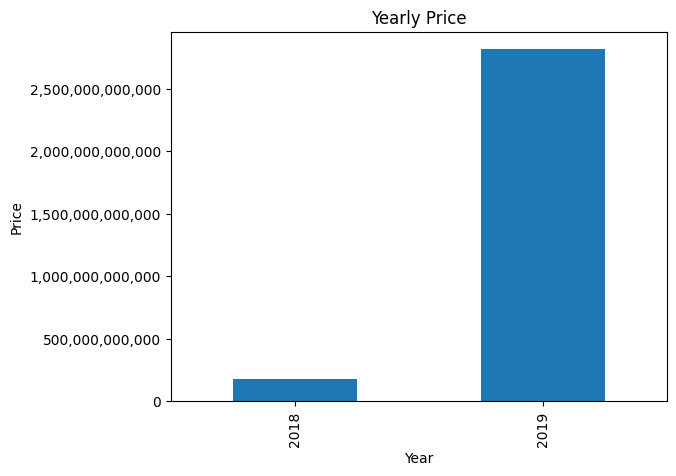

In [17]:
fig, ax = plt.subplots()
yearly_price.plot(kind='bar', ax=ax)
ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))
)
ax.set_ylabel('Price')
ax.set_xlabel('Year')
ax.set_title('Yearly Price')
plt.show()

In [18]:
data.head()

,property_type,price,location,city,latitude,longitude,baths,purpose,bedrooms,Total_Area,year
0,Flat,10000000,G-10,Islamabad,33.679890,73.012640,2,For Sale,2,1089.004,2019
1,Flat,6900000,E-11,Islamabad,33.700993,72.971492,3,For Sale,3,15246.056,2019
2,House,16500000,G-15,Islamabad,33.631486,72.926559,6,For Sale,5,2178.008,2019
3,House,43500000,Bani Gala,Islamabad,33.707573,73.151199,4,For Sale,4,10890.000,2019
4,House,7000000,DHA Defence,Islamabad,33.492591,73.301339,3,For Sale,3,2178.008,2019


In [19]:
property_types = data['property_type'].value_counts()
property_types

property_type
House            105468
Flat              38238
Upper Portion     13774
Lower Portion      9229
Room                685
Farm House          657
Penthouse           395
Name: count, dtype: int64

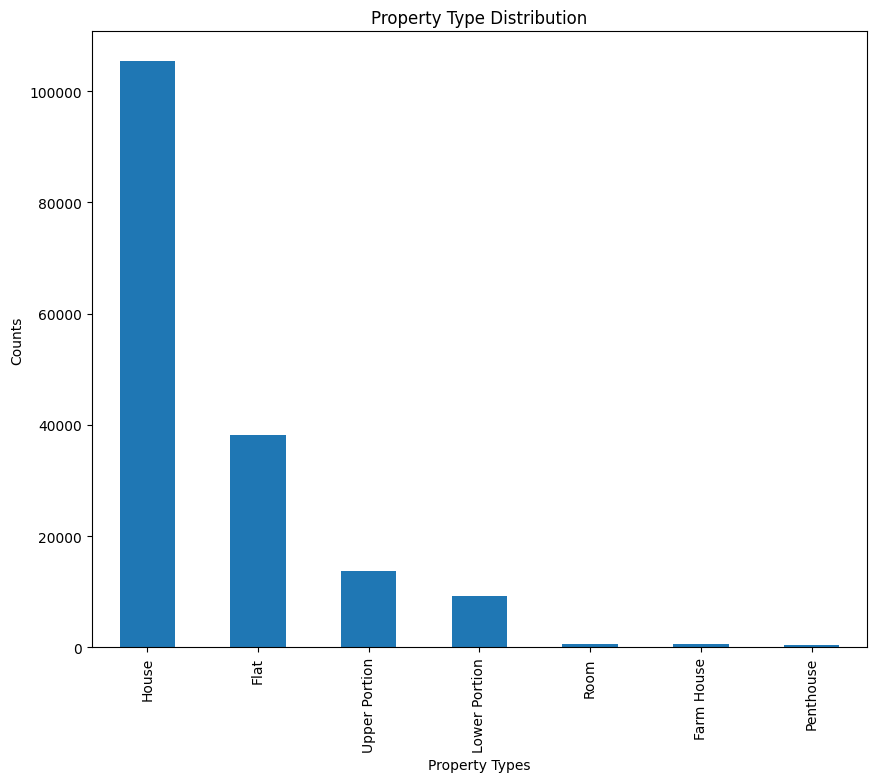

In [20]:
plt.figure(figsize=(10, 8))
property_types.plot(kind='bar')
plt.xlabel("Property Types")
plt.ylabel("Counts")
plt.title("Property Type Distribution")
plt.show()

In [21]:
data.head()

,property_type,price,location,city,latitude,longitude,baths,purpose,bedrooms,Total_Area,year
0,Flat,10000000,G-10,Islamabad,33.679890,73.012640,2,For Sale,2,1089.004,2019
1,Flat,6900000,E-11,Islamabad,33.700993,72.971492,3,For Sale,3,15246.056,2019
2,House,16500000,G-15,Islamabad,33.631486,72.926559,6,For Sale,5,2178.008,2019
3,House,43500000,Bani Gala,Islamabad,33.707573,73.151199,4,For Sale,4,10890.000,2019
4,House,7000000,DHA Defence,Islamabad,33.492591,73.301339,3,For Sale,3,2178.008,2019


In [24]:
property_type_baths_bedrooms = data.groupby('property_type')[['baths', 'bedrooms']].sum()

AttributeError: 'dict' object has no attribute 'groupby'

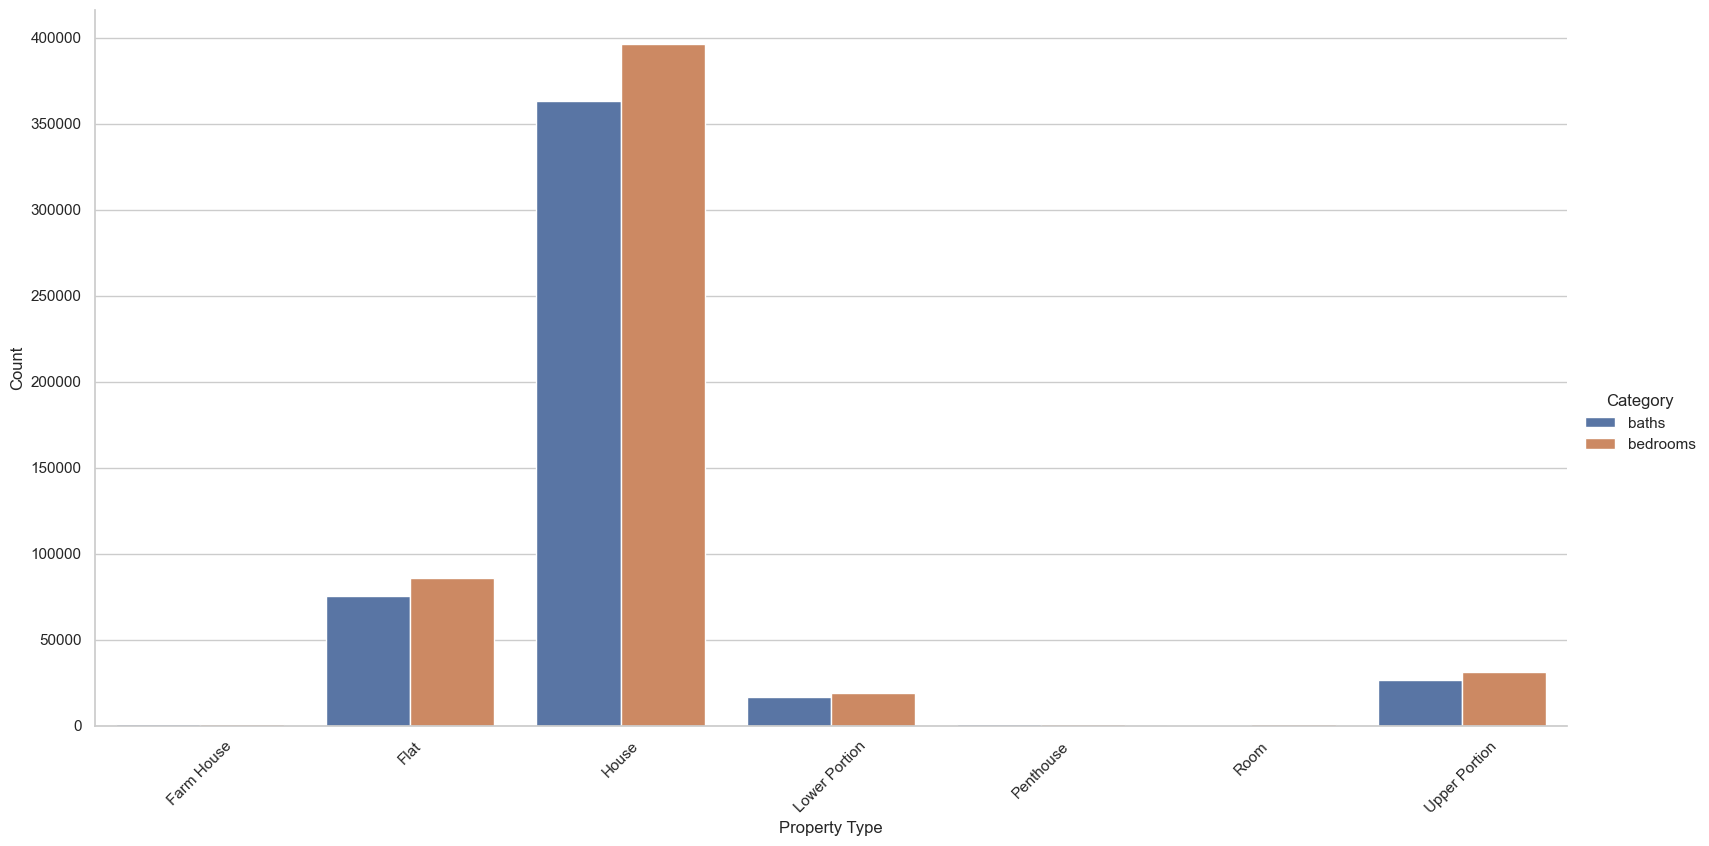

In [23]:
data = {
    'property_type': ['Farm House', 'Flat', 'House', 'Lower Portion', 'Penthouse', 'Room', 'Upper Portion'],
    'baths': [1040, 75248, 362898, 16587, 944, 646, 26789],
    'bedrooms': [1064, 85750, 396350, 19207, 1097, 740, 31353]
}
df = pd.DataFrame(data)

# Melt the DataFrame to long format
df_melted = df.melt(id_vars='property_type', var_name='Category', value_name='Count')

# Plot using seaborn's catplot
sns.set(style="whitegrid")
g = sns.catplot(
    data=df_melted, 
    kind="bar", 
    x="property_type", 
    y="Count", 
    hue="Category", 
    height=8, 
    aspect=2
)

g.set_xticklabels(rotation=45)
g.set_axis_labels("Property Type", "Count")
g._legend.set_title("Category")
g.set_titles("Number of Baths and Bedrooms by Property Type")

plt.show()
